In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
file_path = 'clean_data.xlsx'
data = pd.read_excel(file_path)

In [3]:
print("Header data:")
print(data.head())
print("\nColumn name:")
print(data.columns)

print("\nDataFrame basic information:")
print(data.info())

print("\nStatistical summary:")
print(data.describe())

Header data:
        make     model                       trim         body  transmission  \
0        BMW  3 Series                 328i SULEV        Sedan             1   
1      Volvo       S60                         T5        Sedan             1   
2  Chevrolet     Cruze                        1LT        Sedan             1   
3       Audi        A4  2.0T Premium Plus quattro        Sedan             1   
4  Chevrolet    Camaro                         LT  Convertible             1   

  state  condition  odometer  color interior  \
0    ca         45      1331   gray    black   
1    ca         41     14282  white    black   
2    ca          2     28617  black    black   
3    ca         42      9557  white    black   
4    ca          3      4809    red    black   

                                              seller    mmr  sellingprice  Age  
0             financial services remarketing (lease)  31900         30000    1  
1                            volvo na rep/world omni  2

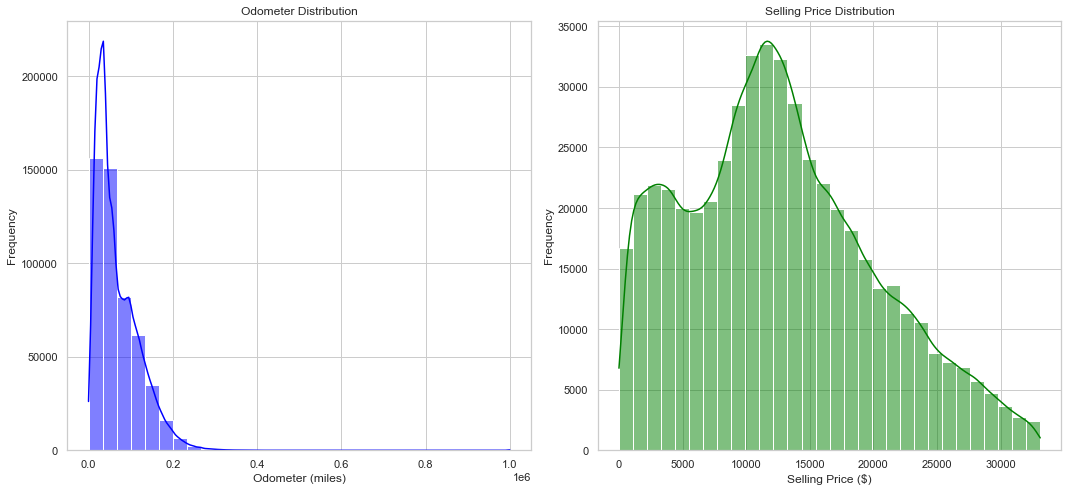

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data['odometer'], bins=30, kde=True, color='blue')
plt.title('Odometer Distribution')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['sellingprice'], bins=30, kde=True, color='green')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = data.drop('sellingprice', axis=1).select_dtypes(include=np.number)
y = data['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dmm = DecisionTreeRegressor(max_depth=5)

dmm.fit(X_train, y_train)

y_pred = dmm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel evaluation metrics:\nMSE (mean square error): {mse}\nRMSE (root mean square error): {rmse}\nMAE (mean absolute error): {mae}\nR^2 (decisive factor): {r2}")


Model evaluation metrics:
MSE (mean square error): 2402611.544849063
RMSE (root mean square error): 1550.0359817917333
MAE (mean absolute error): 1076.0212056029436
R^2 (decisive factor): 0.9565348966228917


Text(0.5, 1.0, 'Actual vs. Predicted Price')

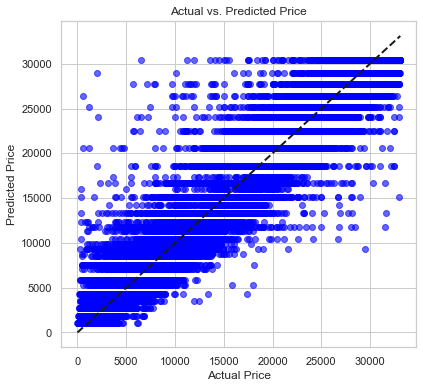

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')




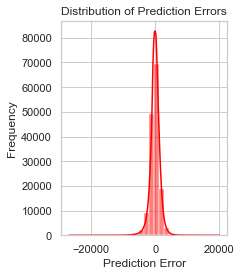

In [16]:
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=30, kde=True, color='red')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


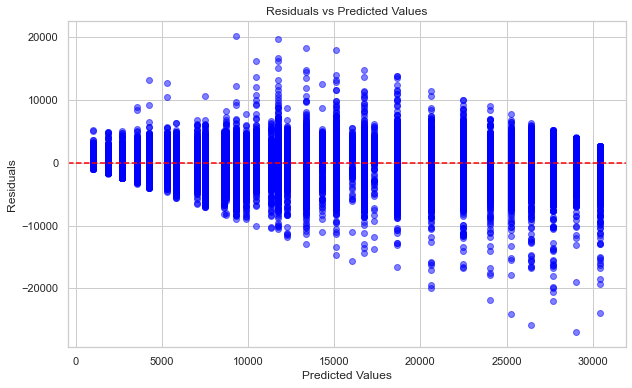

In [17]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()




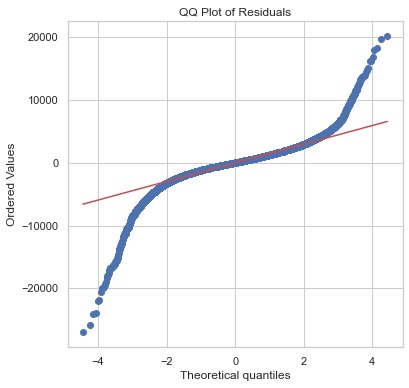

In [14]:
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()